# Objectives

- Multiple Linear Regression
- Correlation - Multicorrelation - Feature Selection
- Understanding the accuracy of the model
- qq-plots and residuals

# Multilinear Regression

In [65]:
import matplotlib.pyplot as plt

import numpy as np


import pandas as pd
import numpy as np

import seaborn as sns

In [66]:
df = pd.read_csv('Advertising.csv', index_col = 0 )

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


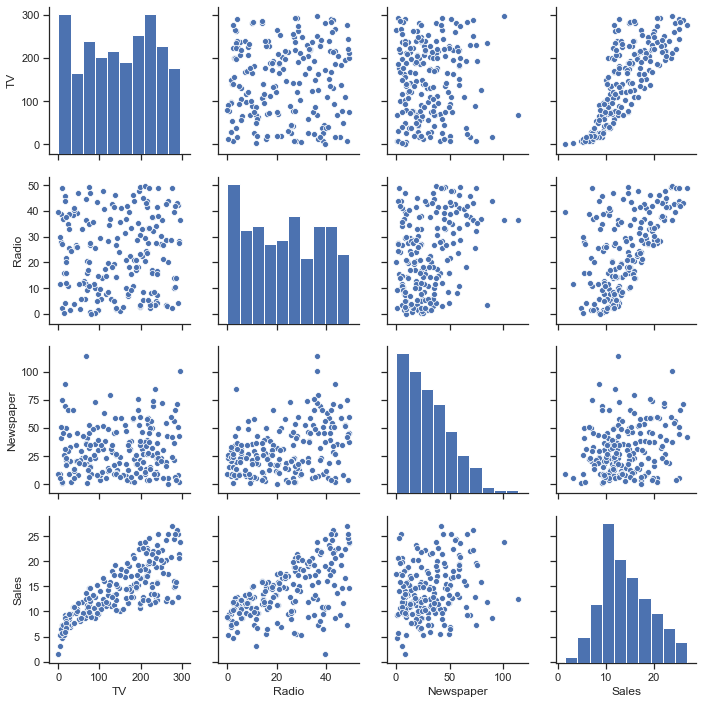

In [3]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)
plt.show()

Recall that yesterday we only used one variable X = 'TV' to be able to under y= 'Sales'. Today we will use all of the variables given in the dataset.

__Your Turn__

- Before we move to multiple linear regression, let's practice yesterday's skills a little bit more.

- This time use X = 'Newspaper' variable and fit a simple (one variable) linear regression to y= 'Sales'

- Use statsmodels package again.

In [68]:
## First define X and y variables

X = df.Newspaper.values

y = df.Sales.values


In [69]:
## Import statsmodel API -- recall that we call it 'sm'
import statsmodels.api as sm


## Now we can add constants to X
## recall that sm has an add_constant method
Xconst = sm.add_constant(X)


[Statsmodels OLS: Check examples if you are not familiar with this package](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

In [70]:
## Now we can instantiate OLS class in sm.
## Don't forget to add y and X to sm.OLS to instantiate.
model = sm.OLS(y, Xconst, hasconst= True)

## fit the model by calling fit() method.

fitted_model = model.fit()

## Let's check the model with summary method


fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 17 Mar 2020   Prob (F-statistic):            0.00115
Time:                        11:22:46   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
x1             0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Correlation between Newspaper and Sales

We can check correlation between two variables in a couple of different ways depending on the data types of the variables.

In [28]:
## Correlation with columns of dataframes

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [74]:

correlation = 0.228299
R_squared = correlation**2
R_squared

0.052120433401

Note as as we discussed yesterday (__only in one variable__) $R^{2}$ = $(\text{pearson-r})^{2}$

In [30]:
## check the R_squared from the summary

0.228299**2

0.052120433401

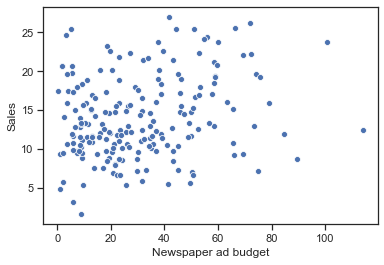

In [75]:
## let's plot df

sns.scatterplot(df['Newspaper'], df['Sales'])

plt.xlabel('Newspaper ad budget')

plt.ylabel('Sales')
plt.show()

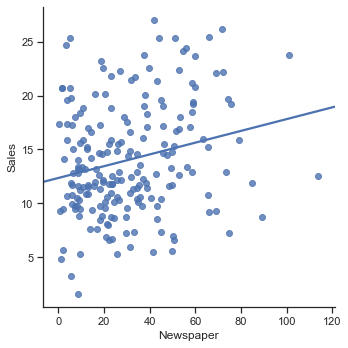

In [33]:
## seaborn has a very hand method lmplot for regression visualizations
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df, ci = 0);

# Multiple Linear Regression

- When we have more than one variable our linear model will look like as:

__MODEL__

$$ Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon$$


__Notation:__

- $X_{1}, \cdots, X_{p}$ :  Columns of the dataset (or features or predictors or independent variables)

- $Y$ : target column in the dataset (or target variable or dependent variable)

- $\epsilon$ : Irreducible error.

__Goal:__ Given a dataset $X$ (in our case whole advertising dataset) we would like to find estimates $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$ from this data (sample) for the (population) parameters $\beta_{0}, \cdots, \beta_{p}$

- Once $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$  are given, then we can make predictions for new observations:

$$ \hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{1} +\hat{\beta}_{2}x_{2} + \cdots \hat{\beta}_{p}x_{p} $$

for a given observation (sample or row) $x = [x_{1}, \cdots, x_{p}]$

- Cost function (__objective function__) become:

\begin{align}
RSS &= \sum\limits_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} \\
&= \sum\limits_{i=1}^{n} (y_{i} - \hat{\beta}_{0} - \hat{\beta}_{1} x_{i1}  - \hat{\beta}_{2}x_{i2} - \cdots  - \hat{\beta}_{p}x_{ip})^{2}
\end{align}

Fitting a multiple linear regression with statsmodels API is as easy as simple linear regression

In [76]:
## This time note that we are using all of the independent variables 'TV', 'Newspaper', 'Radio'
X = df[['TV', 'Radio', 'Newspaper']].values

## Target variable (Dependent Variable) is still 'Sales' column
y = df.Sales.values

## We need to add constants for the intercept term
Xconst = sm.add_constant(X)

## Note that the rest is exactly the same with the simple linear regression
model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()
print(multiple_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        11:41:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

This is Ice-cream - Shark attacks 

-- Summer effect + Ice-cream --> Shark Attacks

__Q1:__ Why do we initially get a statistically significant result for the relation between Sales and Newspaper but in the multiple case model tell us that relation is not significant?

In [71]:
## note that There is a correlation between Newspaper and Radio
## This reveals a tendency to spend more on newspaper advertising 
## in markets where more is spent on radio advertising. 

df[features].corr()

,TV,Newspaper,Radio
TV,1.000000,0.056648,0.054809
Newspaper,0.056648,1.000000,0.354104
Radio,0.054809,0.354104,1.000000


__Q2:__ Is at least one of the variables 'TV', 'Newspaper', 'Radio' significantly explains 'Sales'?

__A2:__ This is answered by F-statistics.


__Q3:__ We know that some of the p_values are significant why do we still have to check F-statistics?

__A3:__ Hint: Multiple comparison problem


__Q4:__ How do we choose important variables

- Straight forward selection: try all possible combination with variables and use AIC, BIC etc to choose best.

- Forward selection:

    1. Start with null model
    2. Then one linear model for each separate variables
    3. Pick the variable with lowest RSS
    4. We then add to that model the variable that results variable selection 
    in the lowest RSS for the new two-variable model.
    5. Repeat this until a stoppage criteria is achieved.
- Backward selection

- Mixed Selection

## Inference vs Prediction

- Here let's talk a little bit about inference vs prediction

## Diagnosis: Residuals and QQ-plots

In [62]:
## let's see the results one more time
features = ['TV', 'Newspaper', 'Radio']
X = df[features]
y = df.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        11:00:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


__Your Turn!__

Recall that we initially assumed that the errors should be normally distributed with mean zero and fixed variance. 

__Q:__ Find the residuals and check their distribution.

In [63]:
# %load -r 24-26 supplement.py


In [48]:
import numpy as np

In [49]:
sample_1 = np.random.normal(loc= 0, scale = 5, size = 30)
np.quantile(sample_1, q = 0.01)

-14.244527153438481

In [64]:
import scipy.stats as stats
stats.norm.ppf(loc = 0, scale = 1, q=0.01)
np.quantile(sample_1, q= 0.02)

-12.74790433626831

In [55]:
x_list = []
y_list = []
for q in np.linspace(0.001,1, 100):
        x_list.append(np.quantile(sample_1, q = q))
        y_list.append(stats.norm.ppf(loc = 0, scale = 1, q=q))

In [56]:
import matplotlib.pyplot as plt

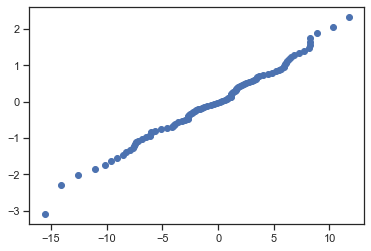

In [57]:
plt.scatter(x_list, y_list)

In [23]:
# %load -r 28 supplement.py
stats.normaltest(residuals)

NormaltestResult(statistic=60.41395945525527, pvalue=7.608085583222715e-14)

In [58]:
fig = sm.qqplot(residuals, line = 'r')
plt.show()

NameError: name 'residuals' is not defined

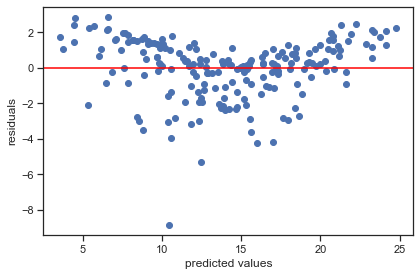

In [27]:
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

# Extras

- On adding constants to X with statsmodels API

<img src="images/Xconst.jpg" width=600 height=500>

- Correlation with numpy

[Documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)

In [27]:

## for numpy ndarrays
X = df.Newspaper.values
y = df.Sales.values
print(type(X), type(y))
from scipy.stats.stats import pearsonr 

pearsonr(X,y)

## The first one is the pearson-r coefficient and the other one is the p-value related to this coefficient.

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(0.22829902637616536, 0.0011481958688882665)

- Using sklearn to fit a multiple linear regression model to this dataset:

First try to solve this own your own - then you can check the answer below.

[Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [38]:
# %load -r 9-22 supplement.py

- Questions related to the F-statistics

[page 75 of ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/)

[check F-distribution](https://en.wikipedia.org/wiki/F-distribution#/media/File:F-distribution_pdf.svg)

- Note that Pearson-r correlation coefficient only checks the linear relation:

In [81]:
X = np.random.normal(size = 100)

X_squared = X**2
pearsonr(X, X_squared)

(-0.09067774507255072, 0.3695976661792198)